## Importing Libraries

In [34]:
# Write Your Code Below
# Import all libraries in this cell
import requests
import numpy as np
import urllib.request
import pandas as pd
import csv
from bs4 import BeautifulSoup
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')  
import warnings
warnings.filterwarnings('ignore')
import dataframe_image as dfi

### Task 1 - Data Collection
Here you will obtain the required data for the analysis. As described in the project instructions, you will perform a web scrap to obtain data from the NCDC website, import data from the John Hopkins repository, and import the provided external data.


Save the data to a DataFrame object.


### A - NCDC Website scrap
Website - https://covid19.ncdc.gov.ng/

In [35]:
from pprint import pprint
from html_table_parser.parser import HTMLTableParser
def url_get_contents(url):
    req = urllib.request.Request(url=url)
    f = urllib.request.urlopen(req)
    return f.read()

xhtml = url_get_contents('https://covid19.ncdc.gov.ng/').decode('utf-8')

p = HTMLTableParser()
p.feed(xhtml)

print(p.tables[0])

print("\n\nPANDAS DATAFRAME\n")
dff = pd.DataFrame(p.tables[0])
dff

[['States Affected', 'No. of Cases (Lab Confirmed)', 'No. of Cases (on admission)', 'No. Discharged', 'No. of Deaths'], ['Lagos', '66,151', '7,157', '58,529', '465'], ['FCT', '20,088', '175', '19,743', '170'], ['Kaduna', '9,194', '37', '9,091', '66'], ['Plateau', '9,120', '42', '9,021', '57'], ['Rivers', '7,976', '397', '7,477', '102'], ['Oyo', '7,357', '401', '6,816', '140'], ['Edo', '4,964', '19', '4,760', '185'], ['Ogun', '4,857', '124', '4,674', '59'], ['Kano', '4,031', '7', '3,914', '110'], ['Ondo', '3,644', '121', '3,455', '68'], ['Kwara', '3,283', '160', '3,068', '55'], ['Akwa Ibom', '3,089', '854', '2,203', '32'], ['Delta', '2,705', '77', '2,556', '72'], ['Osun', '2,636', '40', '2,541', '55'], ['Enugu', '2,490', '16', '2,445', '29'], ['Nasarawa', '2,404', '20', '2,345', '39'], ['Gombe', '2,189', '27', '2,118', '44'], ['Katsina', '2,164', '29', '2,100', '35'], ['Ebonyi', '2,047', '13', '2,002', '32'], ['Anambra', '1,923', '78', '1,826', '19'], ['Abia', '1,736', '32', '1,682', '2

,0,1,2,3,4
0,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
1,Lagos,"66,151","7,157","58,529",465
2,FCT,"20,088",175,"19,743",170
3,Kaduna,"9,194",37,"9,091",66
4,Plateau,"9,120",42,"9,021",57
5,Rivers,"7,976",397,"7,477",102
6,Oyo,"7,357",401,"6,816",140
7,Edo,"4,964",19,"4,760",185
8,Ogun,"4,857",124,"4,674",59
9,Kano,"4,031",7,"3,914",110


In [36]:
dff.head()

,0,1,2,3,4
0,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
1,Lagos,"66,151","7,157","58,529",465
2,FCT,"20,088",175,"19,743",170
3,Kaduna,"9,194",37,"9,091",66
4,Plateau,"9,120",42,"9,021",57


In [37]:
# Another way of scrapping a table using pd.read_html

import pandas as pd
df = pd.read_html("https://covid19.ncdc.gov.ng/")[0]
df.head()

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,66151,7157,58529,465
1,FCT,20088,175,19743,170
2,Kaduna,9194,37,9091,66
3,Plateau,9120,42,9021,57
4,Rivers,7976,397,7477,102


### B - John Hopkins Data Repository
Here you will obtain data from the John Hopkins repository. Your task here involves saving the data from the GitHub repo link to DataFrame for further analysis. Find the links below. 
* Global Daily Confirmed Cases - Click [Here](https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv)
* Global Daily Recovered Cases - Click [Here](https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv)
* Global Daily Death Cases - Click [Here](https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv)

In [38]:
confirmed_global = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
confirmed_global.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/29/21,7/30/21,7/31/21,8/1/21,8/2/21,8/3/21,8/4/21,8/5/21,8/6/21,8/7/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,145996,146523,146523,146523,147985,148572,148933,149361,149810,149810
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,132999,133036,133081,133121,133146,133211,133310,133442,133591,133730
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,168668,170189,171392,172564,173922,175229,176724,178013,179216,180356
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,14655,14678,14678,14678,14747,14766,14797,14809,14836,14836
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,42486,42646,42777,42815,42970,43070,43158,43269,43487,43592


In [39]:
confirmed_global.shape

(279, 568)

In [40]:
death_global = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")
death_global.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/29/21,7/30/21,7/31/21,8/1/21,8/2/21,8/3/21,8/4/21,8/5/21,8/6/21,8/7/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,6615,6677,6677,6677,6774,6804,6836,6864,6879,6879
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,2457,2457,2457,2457,2457,2457,2457,2457,2458,2459
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,4189,4219,4254,4291,4329,4370,4404,4441,4487,4520
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,127,128,128,128,128,128,128,128,128,128
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1003,1008,1011,1016,1018,1022,1026,1032,1042,1044


In [41]:
death_global.shape

(279, 568)

In [42]:
recovered_global = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv")
recovered_global.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/29/21,7/30/21,7/31/21,8/1/21,8/2/21,8/3/21,8/4/21,8/5/21,8/6/21,8/7/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,82586,82586,82586,82586,82586,82586,82586,0,0,0
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,130187,130205,130222,130243,130256,130291,130314,0,0,0
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,113707,114531,115276,116009,116770,117557,118409,0,0,0
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,14180,14210,14210,14210,14296,14348,14380,0,0,0
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,36025,36708,37255,37397,38360,39389,39582,0,0,0


In [43]:
recovered_global.shape

(264, 568)

### C - External Data 
* Save the external data to a DataFrame
* External Data includes but not limited to: `covid_external.csv`, `Budget data.csv`, `RealGDP.csv`

In [44]:
#[Write Your Code Here]
covid_external = pd.read_csv("covid_external.csv")
covid_external.head()

,states,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
0,FCT,North Central,4865000,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79
1,Plateau,North Central,4766000,0.4,0.5,0.4,0.8,0.3,0.3,0.5,0.3,0.93
2,Kwara,North Central,3524000,0.3,0.4,0.3,0.2,0.4,0.2,0.6,0.7,0.93
3,Nassarawa,North Central,2783000,0.1,0.3,0.5,0.9,0.0,0.1,0.6,0.5,0.85
4,Niger,North Central,6260000,0.6,0.0,0.6,0.3,0.7,0.1,0.8,0.8,0.84


In [45]:
RealGDP = pd.read_csv("RealGDP.csv")

In [46]:
RealGDP

,Year,Q1,Q2,Q3,Q4
0,2014,15438679.50,16084622.31,17479127.58,18150356.45
1,2015,16050601.38,16463341.91,17976234.59,18533752.07
2,2016,15943714.54,16218542.41,17555441.69,18213537.29
3,2017,15797965.83,16334719.27,17760228.17,18598067.07
4,2018,16096654.19,16580508.07,18081342.10,19041437.59
5,2019,16434552.65,16931434.89,18494114.17,19530000.00
6,2020,16740000.00,15890000.00,17820000.00,0.00


In [47]:
Budget = pd.read_csv("Budget data.csv")
Budget.head()

,states,Initial_budget (Bn),Revised_budget (Bn)
0,Abia,136.60,102.70
1,Adamawa,183.30,139.31
2,Akwa-Ibom,597.73,366.00
3,Anambra,137.10,112.80
4,Bauchi,167.20,128.00


In [48]:
nigcovid = pd.read_csv("covidnig.csv")
nigcovid.head()

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,"26,708","2,435","24,037",236
1,FCT,"9,627","2,840","6,694",93
2,Kaduna,"4,504",579,"3,877",48
3,Plateau,"4,262",280,"3,948",34
4,Oyo,"3,788",368,"3,374",46


### Task 2 - View the data
Obtain basic information about the data using the `info()` method.

In [49]:
#[Write Your Code Here]
covid_external.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   states                   37 non-null     object 
 1   region                   37 non-null     object 
 2   Population               37 non-null     int64  
 3   Overall CCVI Index       37 non-null     float64
 4   Age                      37 non-null     float64
 5   Epidemiological          37 non-null     float64
 6   Fragility                37 non-null     float64
 7   Health System            37 non-null     float64
 8   Population Density       37 non-null     float64
 9   Socio-Economic           37 non-null     float64
 10   Transport Availability  37 non-null     float64
 11  Acute IHR                37 non-null     float64
dtypes: float64(9), int64(1), object(2)
memory usage: 3.6+ KB


In [50]:
RealGDP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    7 non-null      int64  
 1   Q1      7 non-null      float64
 2   Q2      7 non-null      float64
 3   Q3      7 non-null      float64
 4   Q4      7 non-null      float64
dtypes: float64(4), int64(1)
memory usage: 408.0 bytes


In [51]:
Budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   states               37 non-null     object 
 1   Initial_budget (Bn)  37 non-null     float64
 2   Revised_budget (Bn)  37 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1016.0+ bytes


In [52]:
nigcovid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   States Affected               37 non-null     object
 1   No. of Cases (Lab Confirmed)  37 non-null     object
 2   No. of Cases (on admission)   37 non-null     object
 3   No. Discharged                37 non-null     object
 4   No. of Deaths                 37 non-null     int64 
dtypes: int64(1), object(4)
memory usage: 1.6+ KB


### Task 3 - Data Cleaning and Preparation
From the information obtained above, you will need to fix the data format. 
<br>
Examples: 
* Convert to appropriate data type.
* Rename the columns of the scraped data.
* Remove comma(,) in numerical data
* Extract daily data for Nigeria from the Global daily cases data

TODO A - Clean the scraped data

In [53]:
#[Write Your Code Here]
dff.head()

,0,1,2,3,4
0,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
1,Lagos,"66,151","7,157","58,529",465
2,FCT,"20,088",175,"19,743",170
3,Kaduna,"9,194",37,"9,091",66
4,Plateau,"9,120",42,"9,021",57


In [54]:
dff.columns = ['States Affected', 'No. of Cases (Lab Confirmed)', 'No. of Cases (on admission)', 'No. Discharged', 'No. of Deaths']
dff.head()

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
1,Lagos,"66,151","7,157","58,529",465
2,FCT,"20,088",175,"19,743",170
3,Kaduna,"9,194",37,"9,091",66
4,Plateau,"9,120",42,"9,021",57


In [55]:
dff.drop(0, inplace=True)

In [56]:
dff = dff.replace(',','', regex=True)
dff.head()

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
1,Lagos,66151,7157,58529,465
2,FCT,20088,175,19743,170
3,Kaduna,9194,37,9091,66
4,Plateau,9120,42,9021,57
5,Rivers,7976,397,7477,102


In [57]:
dff.dtypes

States Affected                 object
No. of Cases (Lab Confirmed)    object
No. of Cases (on admission)     object
No. Discharged                  object
No. of Deaths                   object
dtype: object

In [58]:
cols = dff.columns.drop('States Affected')
dff[cols] = dff[cols].apply(pd.to_numeric, errors='coerce')

In [59]:
dff.dtypes

States Affected                 object
No. of Cases (Lab Confirmed)     int64
No. of Cases (on admission)      int64
No. Discharged                   int64
No. of Deaths                    int64
dtype: object

TODO B - Get a Pandas DataFrame for Daily Confirmed Cases in Nigeria. Columns are Date and Cases

In [60]:
covid_df_aggregated = confirmed_global.groupby("Country/Region").sum()
covid_df_aggregated.head()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,7/29/21,7/30/21,7/31/21,8/1/21,8/2/21,8/3/21,8/4/21,8/5/21,8/6/21,8/7/21
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,...,145996,146523,146523,146523,147985,148572,148933,149361,149810,149810
Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,...,132999,133036,133081,133121,133146,133211,133310,133442,133591,133730
Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,...,168668,170189,171392,172564,173922,175229,176724,178013,179216,180356
Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,...,14655,14678,14678,14678,14747,14766,14797,14809,14836,14836
Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,...,42486,42646,42777,42815,42970,43070,43158,43269,43487,43592


In [61]:
covid_df_aggregated = covid_df_aggregated.drop(['Lat', 'Long'], axis=1)

In [62]:
Nigeria_conf_cases = covid_df_aggregated.loc["Nigeria"]
Nigeria_conf_cases

1/22/20         0
1/23/20         0
1/24/20         0
1/25/20         0
1/26/20         0
            ...  
8/3/21     175264
8/4/21     176011
8/5/21     176577
8/6/21     177142
8/7/21     177615
Name: Nigeria, Length: 564, dtype: int64

In [63]:
Nigeria_conf_cases1 = pd.DataFrame(Nigeria_conf_cases).reset_index()
Nigeria_conf_cases1.columns = ['Date', 'No_of_Cases']

In [64]:
Nigeria_conf_cases1

,Date,No_of_Cases
0,1/22/20,0
1,1/23/20,0
2,1/24/20,0
3,1/25/20,0
4,1/26/20,0
...,...,...
559,8/3/21,175264
560,8/4/21,176011
561,8/5/21,176577
562,8/6/21,177142


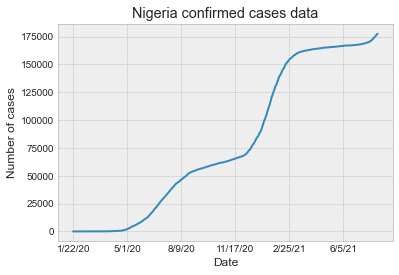

In [33]:
covid_df_aggregated.loc['Nigeria'].plot()
plt.title("Nigeria confirmed cases data")
plt.xlabel("Date")
plt.ylabel("Number of cases")
plt.savefig('C:Nigeria_Confirmed_cases_from_global_data.png', bbox_inches='tight', pad_inches=2, transparent=True)

TODO C - Get a Pandas DataFrame for Daily Recovered Cases in Nigeria. Columns are Date and Cases

In [65]:
recovered_global.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/29/21,7/30/21,7/31/21,8/1/21,8/2/21,8/3/21,8/4/21,8/5/21,8/6/21,8/7/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,82586,82586,82586,82586,82586,82586,82586,0,0,0
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,130187,130205,130222,130243,130256,130291,130314,0,0,0
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,113707,114531,115276,116009,116770,117557,118409,0,0,0
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,14180,14210,14210,14210,14296,14348,14380,0,0,0
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,36025,36708,37255,37397,38360,39389,39582,0,0,0


In [66]:
recovered_aggregated = recovered_global.groupby("Country/Region").sum()

recovered_aggregated = recovered_aggregated.drop(['Lat', 'Long'], axis=1)
Nigeria_recovered = recovered_aggregated.loc["Nigeria"]

Nigeria_recovered = pd.DataFrame(Nigeria_recovered).reset_index()
Nigeria_recovered.columns = ['Date', 'No_of_Cases']

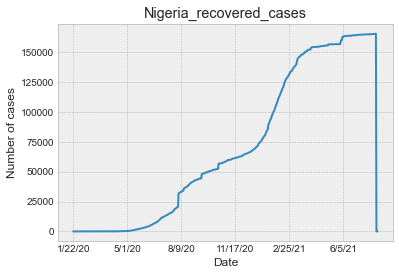

In [67]:
recovered_aggregated.loc['Nigeria'].plot()
plt.title("Nigeria_recovered_cases")
plt.xlabel("Date")
plt.ylabel("Number of cases")
plt.savefig('C:Nigeria_recovered_cases_from_global_data.png', bbox_inches='tight', pad_inches=2, transparent=True)

In [68]:
Nigeria_recovered

,Date,No_of_Cases
0,1/22/20,0
1,1/23/20,0
2,1/24/20,0
3,1/25/20,0
4,1/26/20,0
...,...,...
559,8/3/21,165122
560,8/4/21,165208
561,8/5/21,0
562,8/6/21,0


TODO D - Get a Pandas DataFrame for Daily Death Cases in Nigeria. Columns are Date and Cases

In [69]:
death_global.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/29/21,7/30/21,7/31/21,8/1/21,8/2/21,8/3/21,8/4/21,8/5/21,8/6/21,8/7/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,6615,6677,6677,6677,6774,6804,6836,6864,6879,6879
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,2457,2457,2457,2457,2457,2457,2457,2457,2458,2459
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,4189,4219,4254,4291,4329,4370,4404,4441,4487,4520
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,127,128,128,128,128,128,128,128,128,128
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1003,1008,1011,1016,1018,1022,1026,1032,1042,1044


In [70]:
death_aggregated = death_global.groupby("Country/Region").sum()

death_aggregated = death_aggregated.drop(['Lat', 'Long'], axis=1)
Nigeria_death = death_aggregated.loc["Nigeria"]

Nigeria_death = pd.DataFrame(Nigeria_death).reset_index()
Nigeria_death.columns = ['Date', 'No_of_Cases']

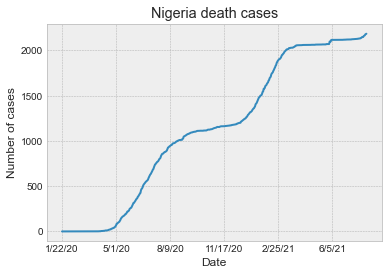

In [71]:
death_aggregated.loc["Nigeria"].plot()
plt.title("Nigeria death cases")
plt.xlabel("Date")
plt.ylabel("Number of cases")
plt.savefig('C:Nigeria_death_cases_from_global_data.png', bbox_inches='tight', pad_inches=2, transparent=True)

In [72]:
Nigeria_death

,Date,No_of_Cases
0,1/22/20,0
1,1/23/20,0
2,1/24/20,0
3,1/25/20,0
4,1/26/20,0
...,...,...
559,8/3/21,2163
560,8/4/21,2167
561,8/5/21,2178
562,8/6/21,2181


In [73]:
#Let's take a look at our columns
columns = confirmed_global.columns
columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '7/29/21', '7/30/21', '7/31/21', '8/1/21', '8/2/21', '8/3/21', '8/4/21',
       '8/5/21', '8/6/21', '8/7/21'],
      dtype='object', length=568)

In [74]:
most_affected=covid_df_aggregated.sort_values(by = columns[-1],ascending = False)
most_affected=most_affected.head(10)

In [75]:
#Let's do a visualization of top 10 countries in confirmed cases
#ax = sns.barplot(x=most_affected[most_affected.columns[-1]], y=most_affected.index.values)
#ax.set_title("Total confirmed cases so far")
#plt.savefig('Desktop:Nigeria_recovered_cases_from_global_data.pdf', bbox_inches='tight', pad_inches=2, transparent=True)

### Task 4 - Analysis
Here you will perform some analyses on the datasets. You are welcome to communicate findings in charts and summary. 
<br>
We have included a few TODOs to help with your analysis. However, do not let this limit your approach, feel free to include more, and be sure to support your findings with chart and summary 

TODO A - Generate a plot that shows the Top 10 states in terms of Confirmed Covid cases by Laboratory test

In [76]:
top_confirmed_cases = dff.nlargest(10, 'No. of Cases (Lab Confirmed)')
top_confirmed_cases

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
1,Lagos,66151,7157,58529,465
2,FCT,20088,175,19743,170
3,Kaduna,9194,37,9091,66
4,Plateau,9120,42,9021,57
5,Rivers,7976,397,7477,102
6,Oyo,7357,401,6816,140
7,Edo,4964,19,4760,185
8,Ogun,4857,124,4674,59
9,Kano,4031,7,3914,110
10,Ondo,3644,121,3455,68


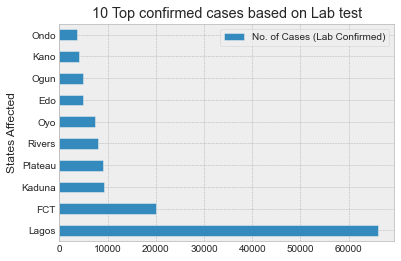

In [77]:
top_confirmed_cases.plot(x= 'States Affected', y='No. of Cases (Lab Confirmed)', kind='barh')
plt.title("10 Top confirmed cases based on Lab test")
plt.savefig('C:10 Top confirmed cases based on Lab test.png', bbox_inches='tight', pad_inches=2, transparent=True)

`Lagos state` has the highest `Discharged` rate with the value of `63263`, followed by `FCT, Kaduna, Plateau state` with the value of `19978, 9141 and 9102` respectively.

TODO B - Generate a plot that shows the Top 10 states in terms of Discharged Covid cases. Hint - Sort the values

In [78]:
top_discharged_cases = dff.nlargest(10, 'No. Discharged')
top_discharged_cases

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
1,Lagos,66151,7157,58529,465
2,FCT,20088,175,19743,170
3,Kaduna,9194,37,9091,66
4,Plateau,9120,42,9021,57
5,Rivers,7976,397,7477,102
6,Oyo,7357,401,6816,140
7,Edo,4964,19,4760,185
8,Ogun,4857,124,4674,59
9,Kano,4031,7,3914,110
10,Ondo,3644,121,3455,68


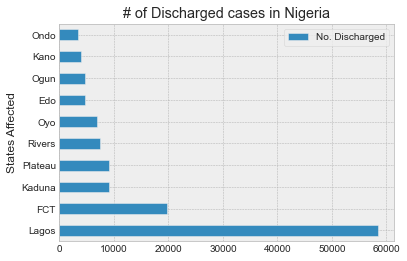

In [79]:
top_discharged_cases.plot(x= 'States Affected', y='No. Discharged', kind='barh')
plt.title("# of Discharged cases in Nigeria")
plt.savefig('C:# of Discharged cases in Nigeria.png', bbox_inches='tight', pad_inches=2, transparent=True)

`Lagos state` has the highest `Discharged` rate with the value of `58515`, followed by `FCT, Kaduna, Plateau state` with the value of `19741, 9065 and 9008` respectively.

TODO D - Plot the top 10 Death cases

In [80]:
top_death_cases = dff.nlargest(10, 'No. of Deaths')
top_death_cases

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
1,Lagos,66151,7157,58529,465
7,Edo,4964,19,4760,185
2,FCT,20088,175,19743,170
6,Oyo,7357,401,6816,140
9,Kano,4031,7,3914,110
5,Rivers,7976,397,7477,102
13,Delta,2705,77,2556,72
10,Ondo,3644,121,3455,68
3,Kaduna,9194,37,9091,66
8,Ogun,4857,124,4674,59


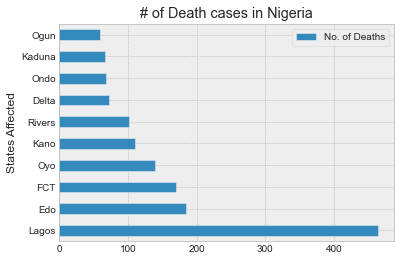

In [81]:
top_death_cases.plot(x= 'States Affected', y='No. of Deaths', kind='barh')
plt.title("# of Death cases in Nigeria")
plt.savefig('C:# of Death cases in Nigeria.png', bbox_inches='tight', pad_inches=2, transparent=True)

`Lagos state` has the highest `death` rate with the value of `456`, followed by `Edo, FCT and Oyo` state with the value of `185, 169 and 131` respectively.

TODO E - Generate a line plot for the total daily confirmed, recovered and death cases in Nigeria

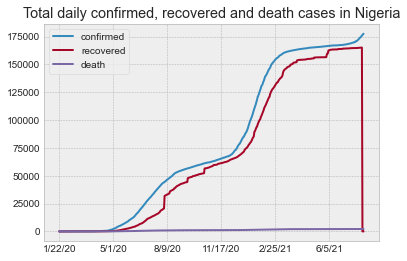

<Figure size 432x288 with 0 Axes>

In [82]:
covid_df_aggregated.loc['Nigeria'].plot(kind= 'line', label='confirmed')
recovered_aggregated.loc['Nigeria'].plot(kind= 'line', label='recovered')
death_aggregated.loc['Nigeria'].plot(kind= 'line', label='death')
plt.title("Total daily confirmed, recovered and death cases in Nigeria")
plt.legend()
plt.show()
plt.savefig('C:comparison.png', bbox_inches='tight', pad_inches=2, transparent=True)

The confirmed cases by Lab has the highest COVID rate, followed by the recovered cases

TODO F - 
* Determine the daily infection rate, you can use the Pandas `diff` method to find the derivate of the total cases.
* Generate a line plot for the above

In [83]:
#find maximum infection rate for all of the countries.
countries = list(covid_df_aggregated.index)
max_infection_rates = []
for c in countries :
    max_infection_rates.append(covid_df_aggregated.loc[c].diff().max())
max_infection_rates

[5721.0,
 1239.0,
 1927.0,
 299.0,
 405.0,
 82.0,
 41080.0,
 2476.0,
 716.0,
 9586.0,
 4451.0,
 471.0,
 3273.0,
 16230.0,
 207.0,
 1975.0,
 23921.0,
 1382.0,
 637.0,
 100.0,
 7072.0,
 3755.0,
 8530.0,
 115228.0,
 26.0,
 7560.0,
 315.0,
 7083.0,
 445.0,
 491.0,
 1130.0,
 9668.0,
 10985.0,
 246.0,
 91.0,
 13990.0,
 15136.0,
 33594.0,
 234.0,
 649.0,
 583.0,
 5992.0,
 767.0,
 4620.0,
 9747.0,
 1152.0,
 17773.0,
 4508.0,
 99.0,
 415.0,
 17.0,
 2370.0,
 11536.0,
 1774.0,
 1292.0,
 1750.0,
 282.0,
 1956.0,
 1068.0,
 2372.0,
 1854.0,
 872.0,
 117900.0,
 595.0,
 587.0,
 5450.0,
 49044.0,
 1975.0,
 4327.0,
 26.0,
 4399.0,
 370.0,
 156.0,
 331.0,
 542.0,
 7.0,
 3812.0,
 11265.0,
 158.0,
 414188.0,
 56757.0,
 39357.0,
 13515.0,
 8227.0,
 11934.0,
 40902.0,
 878.0,
 15487.0,
 9535.0,
 66121.0,
 2008.0,
 1.0,
 1896.0,
 4257.0,
 1993.0,
 11505.0,
 380.0,
 1861.0,
 6154.0,
 931.0,
 398.0,
 4322.0,
 62.0,
 3984.0,
 1967.0,
 7.0,
 1201.0,
 1316.0,
 20889.0,
 2194.0,
 413.0,
 510.0,
 3.0,
 401.0,
 480.0

In [84]:
covid_df_aggregated["max_infection_rates"] = max_infection_rates

In [85]:
covid_data = pd.DataFrame(covid_df_aggregated["max_infection_rates"])

In [86]:
covid_data.columns = covid_data.columns.str.strip()

In [87]:
covid_data.sort_values(by ='max_infection_rates', inplace=True, ascending = False)

In [88]:
top_10=covid_data.head(10)

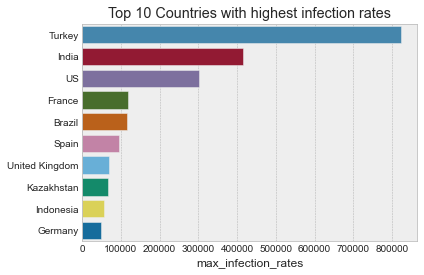

In [89]:
ax = sns.barplot(x=top_10['max_infection_rates'], y=top_10.index.values)
ax.set_title("Top 10 Countries with highest infection rates")
plt.savefig('C:Top 10 countries.png', bbox_inches='tight', pad_inches=2, transparent=True)

TODO G - 
* Calculate maximum infection rate for a day (Number of new cases)
* Find the date

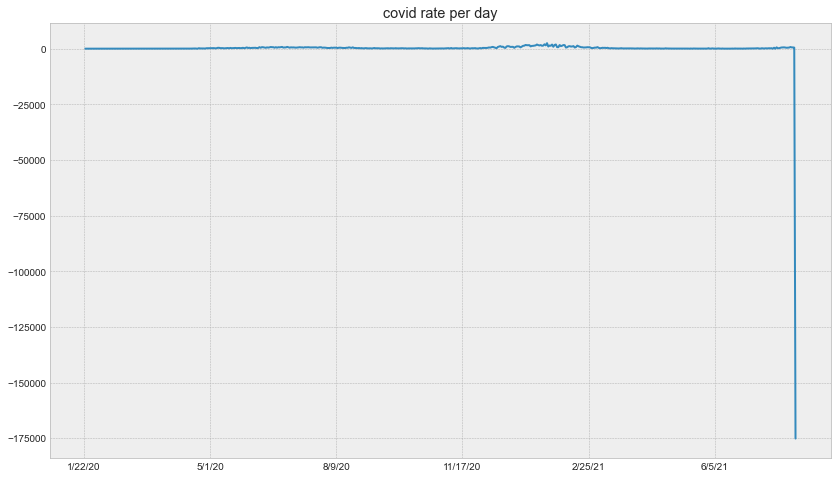

In [90]:
plt.figure(figsize=(14,8))

covid_df_aggregated.loc["Nigeria"].diff().plot()
plt.title("covid rate per day")
plt.savefig('C:difference.pdf', bbox_inches='tight', pad_inches=2, transparent=True)

In [91]:
covid_df_aggregated.loc["Nigeria"].diff().max()

2464.0

In [92]:
#find maxmimum infection rate for Nigeria with the date
Nigeria_infection_daily = covid_df_aggregated.loc['Nigeria', :].diff()

Nigeria_infection_daily.index.name = 'Dates'

Nigeria_infection_daily.to_frame()
Nigeria_infection_daily.sort_values(ascending=False)

Dates
1/23/21                  2464.0
1/21/21                  1964.0
1/30/21                  1883.0
1/15/21                  1867.0
1/27/21                  1861.0
                         ...   
2/25/20                     0.0
2/24/20                     0.0
2/23/20                     0.0
max_infection_rates   -175151.0
1/22/20                     NaN
Name: Nigeria, Length: 565, dtype: float64

The `maximum` infection daily rate occurred on `1/23/21` with a total of `2464` people infected

TODO H - Determine the relationship between the external dataset and the NCDC COVID-19 dataset. 
Here you will generate a line plot of top 10 confirmed cases and the overall community vulnerability index on the same axis. From the graph, explain your observation.
<br>
Steps
* Combine the two dataset together on a common column(states)
* Create a new dataframe for plotting. This DataFrame will contain top 10 states in terms of confirmed cases i.e sort by confirmed cases. ** Hint: Check out Pandas [nlargest](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nlargest.html) function. This [tutorial](https://cmdlinetips.com/2019/03/how-to-select-top-n-rows-with-the-largest-values-in-a-columns-in-pandas/) can help out ** 
* Plot both variable on the same axis. Check out this [tutorial](http://kitchingroup.cheme.cmu.edu/blog/2013/09/13/Plotting-two-datasets-with-very-different-scales/)

In [93]:
#Combining two dataset(covid_external, dff) together on a common column(states)

merged = pd.merge(covid_external, dff, left_on='states', right_on='States Affected')
merged.drop(columns='States Affected', axis =1, inplace = True)
merged.head()

,states,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,FCT,North Central,4865000,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79,20088,175,19743,170
1,Plateau,North Central,4766000,0.4,0.5,0.4,0.8,0.3,0.3,0.5,0.3,0.93,9120,42,9021,57
2,Kwara,North Central,3524000,0.3,0.4,0.3,0.2,0.4,0.2,0.6,0.7,0.93,3283,160,3068,55
3,Niger,North Central,6260000,0.6,0.0,0.6,0.3,0.7,0.1,0.8,0.8,0.84,963,29,914,20
4,Benue,North Central,6376000,0.5,0.7,0.5,0.7,0.4,0.4,0.3,0.5,0.91,1366,15,1327,24


In [94]:
#New DataFrame containing top 10 states in terms of confirmed cases

top10_state = merged.nlargest(10, 'No. of Cases (Lab Confirmed)')
top10_state

,states,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
29,Lagos,South West,13992000,0.0,0.1,1.0,0.3,0.1,1.0,0.1,0.4,0.93,66151,7157,58529,465
0,FCT,North Central,4865000,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79,20088,175,19743,170
13,Kaduna,North West,9227000,0.7,0.1,0.9,0.8,0.9,0.4,0.6,0.4,0.86,9194,37,9091,66
1,Plateau,North Central,4766000,0.4,0.5,0.4,0.8,0.3,0.3,0.5,0.3,0.93,9120,42,9021,57
25,Rivers,South South,7763000,0.4,0.5,0.9,0.6,0.6,0.9,0.1,0.1,1.00,7976,397,7477,102
30,Oyo,South West,8737000,0.2,0.7,0.8,0.2,0.8,0.6,0.2,0.3,1.06,7357,401,6816,140
24,Edo,South South,4705000,0.1,0.9,0.8,0.1,0.1,0.5,0.4,0.3,1.09,4964,19,4760,185
31,Ogun,South West,5878000,0.3,0.6,0.7,0.5,0.6,0.6,0.0,0.2,1.07,4857,124,4674,59
12,Kano,North West,14726000,0.6,0.2,0.1,0.3,0.4,0.8,0.8,0.5,0.87,4031,7,3914,110
32,Ondo,South West,5185000,0.1,0.8,0.5,0.1,0.3,0.6,0.3,0.3,1.04,3644,121,3455,68


<Figure size 1296x720 with 0 Axes>

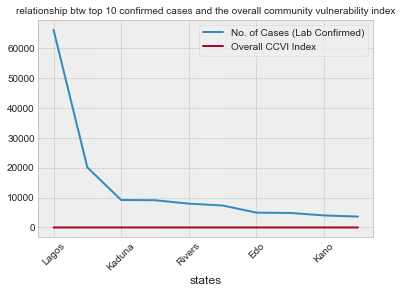

<Figure size 432x288 with 0 Axes>

In [95]:
plt.figure(figsize=(18,10))

top10_state.plot(x='states', y=['No. of Cases (Lab Confirmed)', 'Overall CCVI Index'], kind='line')
plt.title("relationship btw top 10 confirmed cases and the overall community vulnerability index", fontsize=10)
plt.xticks(rotation=45)
plt.legend()
plt.show()

plt.savefig('C:relationship.png', bbox_inches='tight', pad_inches=2, transparent=True)

<Figure size 432x288 with 0 Axes>

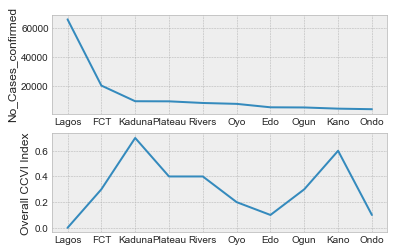

In [96]:
plt.figure()
f, axes = plt.subplots(2, 1)
x = top10_state['states']
y1 = top10_state['No. of Cases (Lab Confirmed)']
y2 = top10_state['Overall CCVI Index']
axes[0].plot(x, y1)
axes[0].set_ylabel('No_Cases_confirmed')

axes[1].plot(x, y2)
axes[1].set_ylabel('Overall CCVI Index')

plt.savefig('C:relationship.png', bbox_inches='tight', pad_inches=2, transparent=True)

From the Graph shown above,`Lagos` has the highest rate of covid_19, followed by `FCT` and `Kaduna` `state`

TODO I - Determine the relationship between the external dataset and the NCDC COVID-19 dataset. 
* Here you will generate a regression plot between two variables to visualize the linear relationships - Confirmed Cases and Population Density.
Hint: Check out Seaborn [Regression Plot](https://seaborn.pydata.org/generated/seaborn.regplot.html).
* Provide a summary of your observation

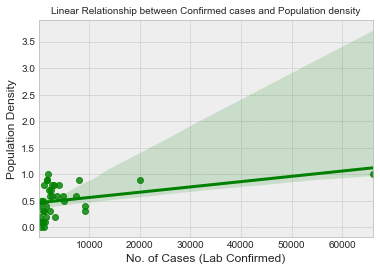

In [97]:
sns.regplot(x='No. of Cases (Lab Confirmed)', y = 'Population Density', data=merged, color='g' )
plt.title("Linear Relationship between Confirmed cases and Population density", fontsize=10)
plt.savefig('C:Confirmed cases and Population density.png', bbox_inches='tight', pad_inches=2, transparent=True)

There is a weak, positive, linear relationship between No. of cases(Lab confirmed) and Population Density

Text(0.5, 1.0, 'Linear Relationship between Confirmed cases and Deaths cases')

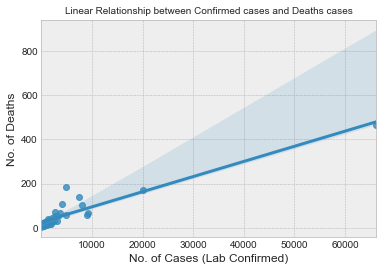

In [98]:
sns.regplot(x='No. of Cases (Lab Confirmed)', y = 'No. of Deaths', data=merged)
plt.title("Linear Relationship between Confirmed cases and Deaths cases", fontsize=10)

There is a `moderate`, `positive`, `linear relationship` between `No. of cases (Lab confirmed)` and `No. of Deaths`

Text(0.5, 1.0, 'Linear Relationship between Confirmed cases and cases on admission')

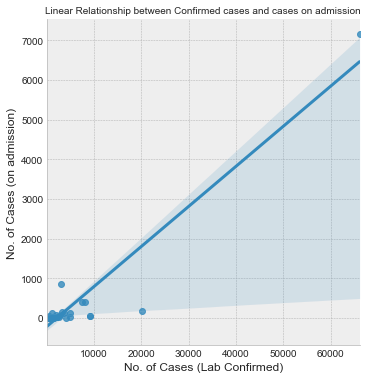

In [99]:
sns.lmplot(x='No. of Cases (Lab Confirmed)', y = 'No. of Cases (on admission)', data=merged)
plt.title("Linear Relationship between Confirmed cases and cases on admission", fontsize=10)

There is a `moderate`, `positive`, `linear relationship` between `No. of cases (Lab confirmed)` and `No. of cases (on admission)`

Text(0.5, 1.0, 'Linear Relationship between Confirmed cases and Population')

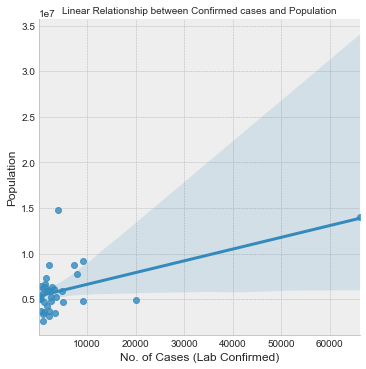

In [100]:
sns.lmplot(x='No. of Cases (Lab Confirmed)', y = 'Population', data=merged)
plt.title("Linear Relationship between Confirmed cases and Population", fontsize=10)

There is a `Average`, `positive`, `linear relationship` between `No. of cases (Lab confirmed)` and `Population`.

### TODO L - 
Determine the effect of the Pandemic on the economy. To do this, you will compare the Real GDP value Pre-COVID-19 with Real GDP in 2020 (COVID-19 Period, especially Q2 2020)
<br>
Steps
* From the Real GDP Data, generate a `barplot` using the GDP values for each year & quarters. For example: On x-axis you will have year 2017 and the bars will be values of each quarters(Q1-Q4). You expected to have subplots of each quarters on one graph.
<br>
Hint: Use [Pandas.melt](https://pandas.pydata.org/docs/reference/api/pandas.melt.html) to create your plot DataFrame 
* Set your quarter legend to lower left.
* Using `axhline`, draw a horizontal line through the graph at the value of Q2 2020.
* Write out your observation

In [101]:
RealGDP

,Year,Q1,Q2,Q3,Q4
0,2014,15438679.50,16084622.31,17479127.58,18150356.45
1,2015,16050601.38,16463341.91,17976234.59,18533752.07
2,2016,15943714.54,16218542.41,17555441.69,18213537.29
3,2017,15797965.83,16334719.27,17760228.17,18598067.07
4,2018,16096654.19,16580508.07,18081342.10,19041437.59
5,2019,16434552.65,16931434.89,18494114.17,19530000.00
6,2020,16740000.00,15890000.00,17820000.00,0.00


In [102]:
melted_REALDGP = pd.melt(RealGDP, id_vars=['Year'], value_vars=['Q1', 'Q2', 'Q3', 'Q4'], var_name='Quarters', value_name='Amount')
melted_REALDGP

,Year,Quarters,Amount
0,2014,Q1,15438679.50
1,2015,Q1,16050601.38
2,2016,Q1,15943714.54
3,2017,Q1,15797965.83
4,2018,Q1,16096654.19
5,2019,Q1,16434552.65
6,2020,Q1,16740000.00
7,2014,Q2,16084622.31
8,2015,Q2,16463341.91
9,2016,Q2,16218542.41


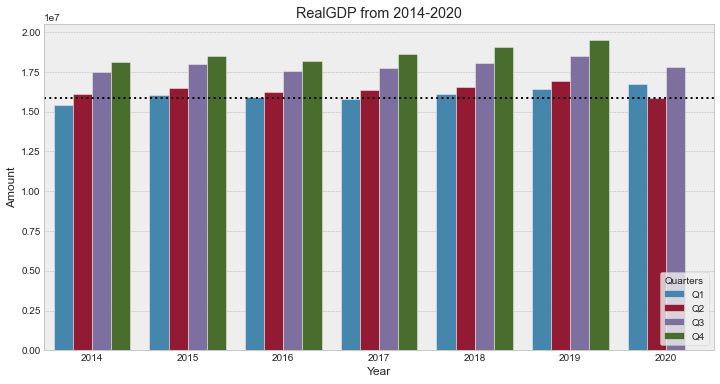

In [103]:
plt.figure(figsize=(12,6))

sns.barplot(data = melted_REALDGP, x = 'Year', y = 'Amount', hue='Quarters')
plt.xlabel("Year")
plt.ylabel("Amount")
plt.title("RealGDP from 2014-2020")
plt.axhline(y =15890000, linestyle = ':', linewidth=2, color = 'k')
plt.savefig('C:REALGDP.png', bbox_inches='tight', pad_inches=2, transparent=True)

The chart above shows `RealGDP` value from `2016 - 2020`. The Realgdp value increases eachh year `except` for the `year 2016(Q2`
`2019` has the `highest` RealGDP value for all the Quarters based on this data.
`2020(Q2)` has the lowest value and has no vaue for `Q4`

In [104]:
Budget_diff = Budget
Budget_diff['Budget_diff (Bn)'] = Budget_diff['Initial_budget (Bn)'] - Budget_diff['Revised_budget (Bn)']
Budget_diff

,states,Initial_budget (Bn),Revised_budget (Bn),Budget_diff (Bn)
0,Abia,136.60,102.70,33.90
1,Adamawa,183.30,139.31,43.99
2,Akwa-Ibom,597.73,366.00,231.73
3,Anambra,137.10,112.80,24.30
4,Bauchi,167.20,128.00,39.20
5,Bayelsa,242.18,183.15,59.03
6,Benue,189.00,119.00,70.00
7,Borno,146.80,108.80,38.00
8,Cross River,1100.00,147.10,952.90
9,Delta,395.50,282.30,113.20


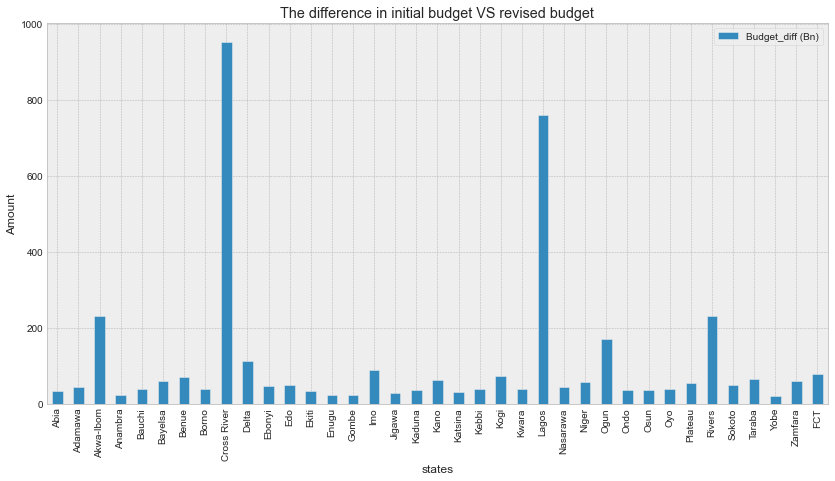

In [105]:
Budget_diff.plot(x='states', y='Budget_diff (Bn)',kind='bar', figsize=(14,7))
plt.ylabel("Amount")
plt.title("The difference in initial budget VS revised budget")
plt.savefig('C:The diff in budget.png', bbox_inches='tight', pad_inches=2, transparent=True)

The chart above shows the difference amount between the initial budget and the revised budget due to COVID-19. `Cross Rivers` budget was drastically reduced with the value of `952.9 Billion`, followed by `Lagos state`, `Rivers, Akwa-Ibom and Ogun state` with the value of `759.50, 230.40, 231.73 and 169.90` `Billion` respectively.

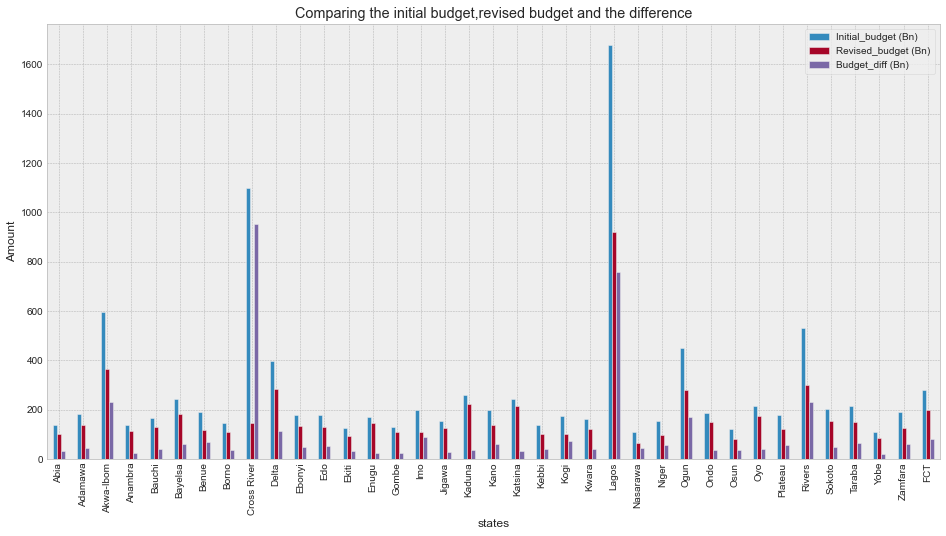

In [106]:
Budget_diff.plot(x='states', kind='bar', figsize=(16,8))
plt.ylabel("Amount")
plt.title("Comparing the initial budget,revised budget and the difference")
plt.savefig('C:compare in budget.png', bbox_inches='tight', pad_inches=2, transparent=True)

In [131]:
top_Initial_state = Budget.nlargest(5, 'Initial_budget (Bn)')
top_Initial_state

,states,Initial_budget (Bn),Revised_budget (Bn),Budget_diff (Bn)
23,Lagos,1680.00,920.5,759.50
8,Cross River,1100.00,147.1,952.90
2,Akwa-Ibom,597.73,366.0,231.73
31,Rivers,530.80,300.4,230.40
26,Ogun,449.90,280.0,169.90


In [139]:
top_Revised_state = Budget.nlargest(5, 'Revised_budget (Bn)')
top_Revised_state

,states,Initial_budget (Bn),Revised_budget (Bn),Budget_diff (Bn)
23,Lagos,1680.00,920.5,759.50
2,Akwa-Ibom,597.73,366.0,231.73
31,Rivers,530.80,300.4,230.40
9,Delta,395.50,282.3,113.20
26,Ogun,449.90,280.0,169.90


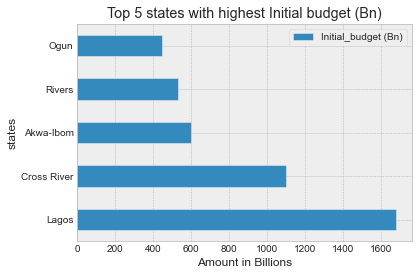

In [137]:
top_Initial_state.plot(x= 'states', y='Initial_budget (Bn)', kind='barh')
plt.title("Top 5 states with highest Initial budget (Bn)")
plt.xlabel("Amount in Billions")
plt.savefig('C:Initial budget.png', bbox_inches='tight', pad_inches=2, transparent=True)

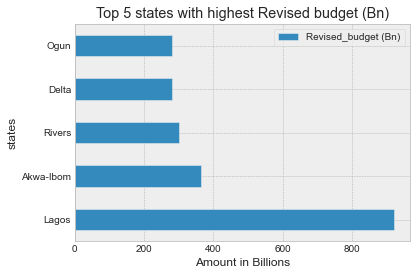

In [138]:
top_Revised_state.plot(x= 'states', y='Revised_budget (Bn)', kind='barh')
plt.title("Top 5 states with highest Revised budget (Bn)")
plt.xlabel("Amount in Billions")
plt.savefig('C:Revised budget.png', bbox_inches='tight', pad_inches=2, transparent=True)

# TIME SERIES

In [107]:
Nigeria = pd.DataFrame(Nigeria_conf_cases) 

Nigeria.columns = ['Cases']
Nigeria.index = pd.to_datetime(Nigeria.index)

Nigeria.index

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31',
               ...
               '2021-07-29', '2021-07-30', '2021-07-31', '2021-08-01',
               '2021-08-02', '2021-08-03', '2021-08-04', '2021-08-05',
               '2021-08-06', '2021-08-07'],
              dtype='datetime64[ns]', length=564, freq=None)

<AxesSubplot:>

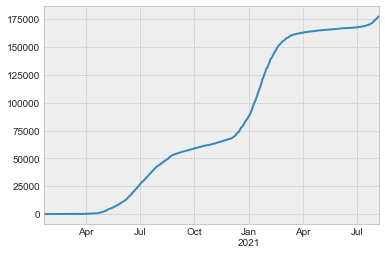

In [108]:
Nigeria['Cases'].resample('D').mean().plot()

<BarContainer object of 20 artists>

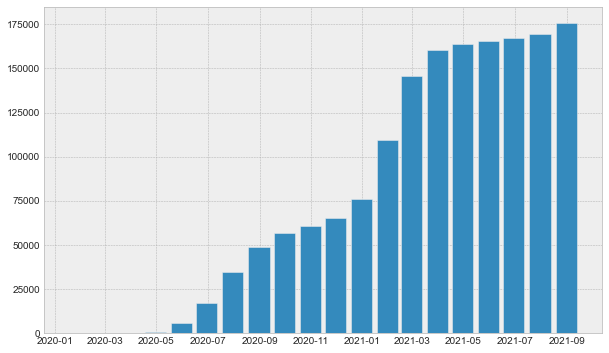

In [109]:
import matplotlib.dates as mdates
Nigeria_month = Nigeria.resample("M").mean()

fig, ax = plt.subplots(figsize=(10, 6))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.bar(Nigeria_month['2020':].index, Nigeria_month.loc['2020':, "Cases"], width=25, align='center')

<AxesSubplot:>

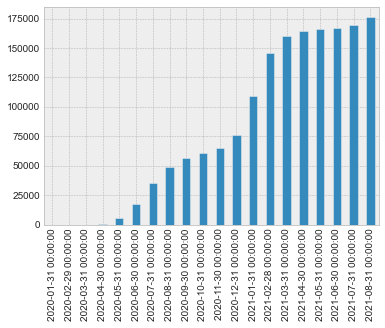

In [110]:
Nigeria.Cases.resample('M').mean().plot(kind='bar')

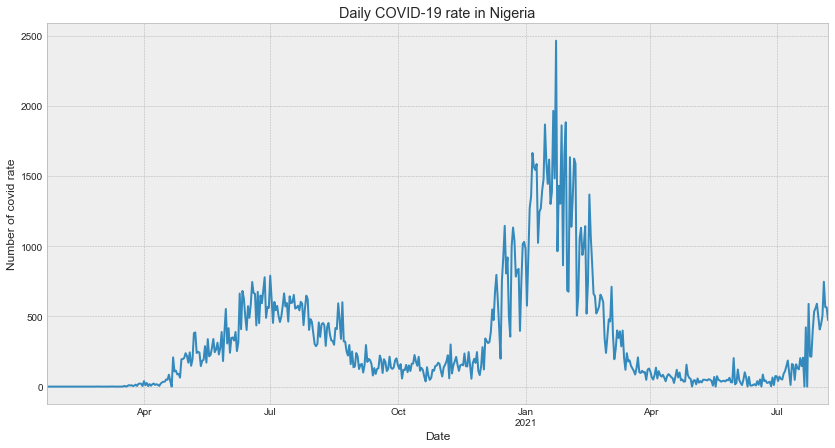

In [111]:
Nigeria['Daily_covid_rate'] = Nigeria.diff()
plt.xlabel("Date")
plt.ylabel("Number of covid rate")
Nigeria['Daily_covid_rate'].plot(figsize=(14,7))
plt.title("Daily COVID-19 rate in Nigeria")
plt.savefig('C:Daily covid_rate in Nigeria.png', bbox_inches='tight', pad_inches=2, transparent=True)

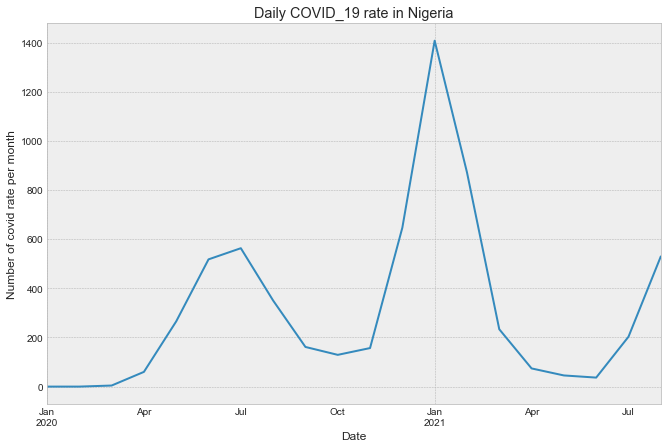

In [112]:
Nigeria['Daily_covid_rate'].resample('M').mean().plot(figsize=(11,7))#M means monthly
plt.xlabel("Date")
plt.ylabel("Number of covid rate per month")
plt.title("Daily COVID_19 rate in Nigeria")
plt.savefig('C:Covid.png', bbox_inches='tight', pad_inches=2, transparent=True)

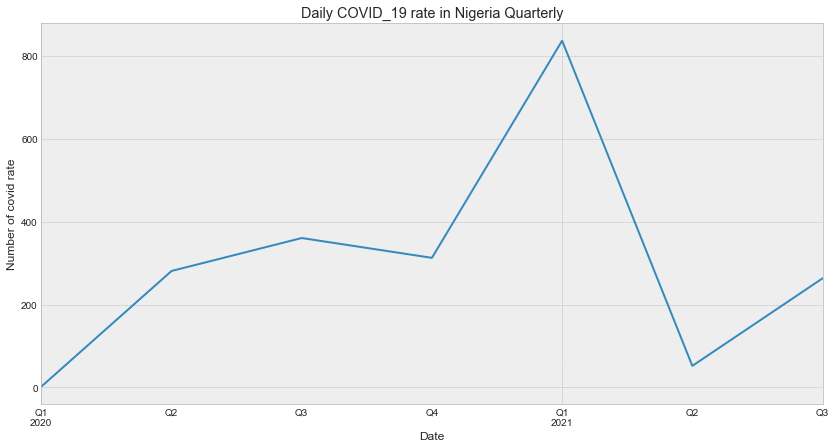

In [113]:
Nigeria['Daily_covid_rate'].resample('Q').mean().plot(figsize=(14,7))#Q means Quarter 1/3
plt.xlabel("Date")
plt.ylabel("Number of covid rate")
plt.title("Daily COVID_19 rate in Nigeria Quarterly")
plt.savefig('C:Quarterly Covid.png', bbox_inches='tight', pad_inches=2, transparent=True)

This chart shows that, the highest covid rate occurred in the first Quarter.

(array([18628., 18659., 18687., 18718., 18748., 18779., 18809., 18840.,
        18871.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

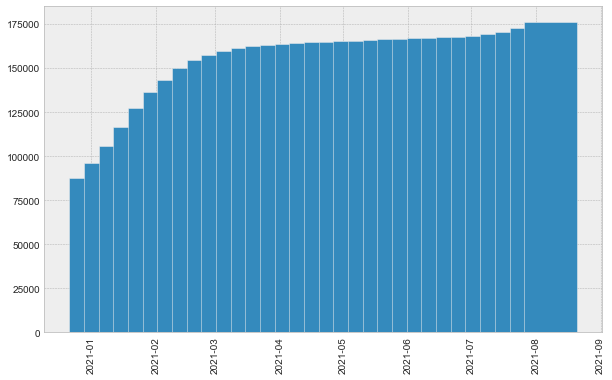

In [114]:
import matplotlib.dates as mdates
Nigeria_week = Nigeria.resample("W").mean()

fig, ax = plt.subplots(figsize=(10, 6))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.bar(Nigeria_week['2021'].index, Nigeria_week.loc['2021', "Cases"], width=25, align='center')
plt.xticks(rotation=90)

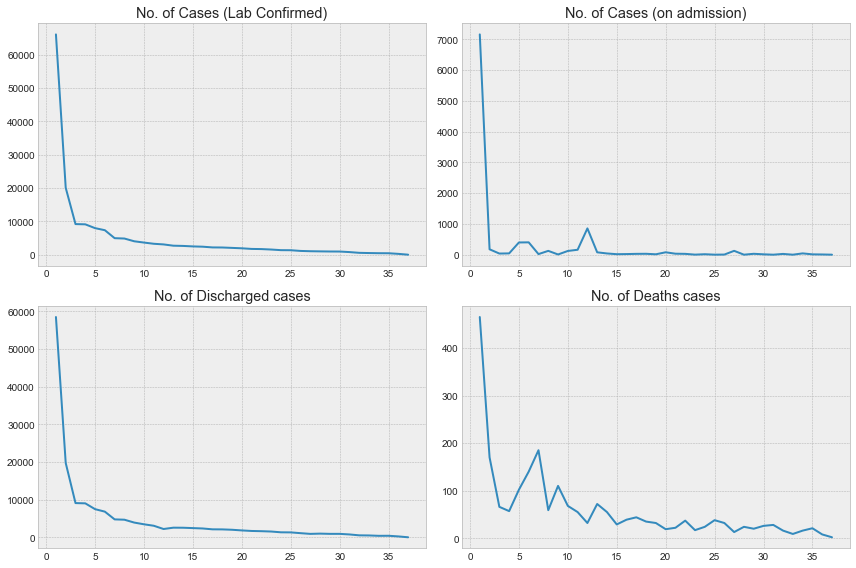

In [115]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

dff['No. of Cases (Lab Confirmed)'].plot(ax=axes[0,0])
dff['No. of Cases (on admission)'].plot(ax=axes[0,1])
dff['No. Discharged'].plot(ax=axes[1,0])
dff['No. of Deaths'].plot(ax=axes[1,1])

axes[0, 0].set_title("No. of Cases (Lab Confirmed)")
axes[0, 1].set_title("No. of Cases (on admission)")
axes[1, 0].set_title("No. of Discharged cases")
axes[1, 1].set_title("No. of Deaths cases")

fig.tight_layout()

In [116]:
merged.corr()

,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
Population,1.000000,-0.104954,-0.439983,0.132941,-0.103085,-0.043338,0.331808,0.005719,-0.117924,-0.150005,0.553993,0.539957,0.551070,0.593190
Overall CCVI Index,-0.104954,1.000000,-0.321567,-0.390732,0.670359,0.555227,-0.582959,0.758501,0.685436,-0.575031,-0.381416,-0.312050,-0.386022,-0.471761
Age,-0.439983,-0.321567,1.000000,0.200897,-0.280675,-0.381606,0.367816,-0.585036,-0.515808,0.835823,-0.291931,-0.207916,-0.300422,-0.206831
Epidemiological,0.132941,-0.390732,0.200897,1.000000,-0.220951,-0.014761,0.407925,-0.516298,-0.608852,0.344245,0.420468,0.331616,0.427490,0.463616
Fragility,-0.103085,0.670359,-0.280675,-0.220951,1.000000,0.303898,-0.494514,0.342684,0.443755,-0.552865,-0.123459,-0.114942,-0.122420,-0.257787
Health System,-0.043338,0.555227,-0.381606,-0.014761,0.303898,1.000000,-0.476858,0.444108,0.378518,-0.365784,-0.241944,-0.234235,-0.240832,-0.262135
Population Density,0.331808,-0.582959,0.367816,0.407925,-0.494514,-0.476858,1.000000,-0.666083,-0.810154,0.579462,0.375194,0.326141,0.377895,0.407654
Socio-Economic,0.005719,0.758501,-0.585036,-0.516298,0.342684,0.444108,-0.666083,1.000000,0.743505,-0.699743,-0.267633,-0.259230,-0.266393,-0.289185
Transport Availability,-0.117924,0.685436,-0.515808,-0.608852,0.443755,0.378518,-0.810154,0.743505,1.000000,-0.721382,-0.202284,-0.113249,-0.210883,-0.261276
Acute IHR,-0.150005,-0.575031,0.835823,0.344245,-0.552865,-0.365784,0.579462,-0.699743,-0.721382,1.000000,-0.075920,-0.015599,-0.083423,0.030619


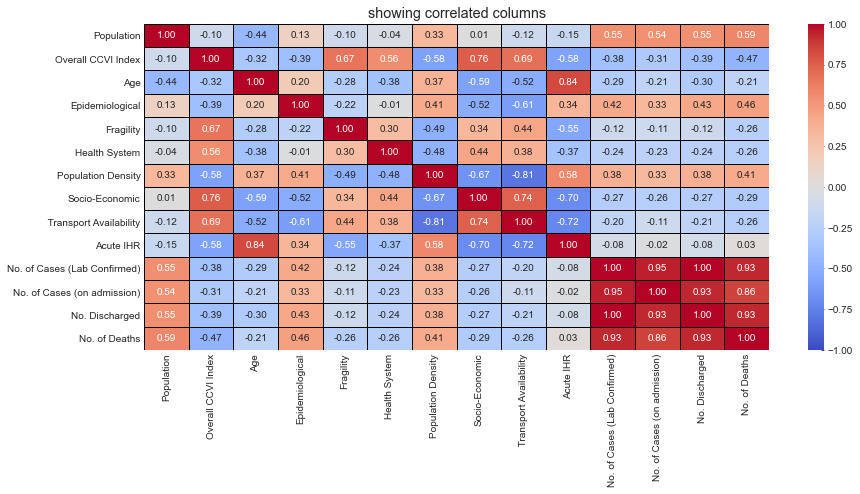

In [117]:
fig, ax = plt.subplots(figsize=(14,6)) 
sns.heatmap(merged.corr(), annot=True, fmt='.2f', vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=1, linecolor='black')
plt.title("showing correlated columns")
plt.savefig('C:covid_seaborn.png', bbox_inches='tight', pad_inches=2, transparent=True)

This chart is to show the correlation between all the columns, all the `NCDC` data are correlation and also correlated with population column. we can as well see that `Acute IHR` column is well correlated with `Age` and `Population density` column.
Overall `CCVI index`, `Epidemiological`, and `Population density` have a high correlation with some other columns. 

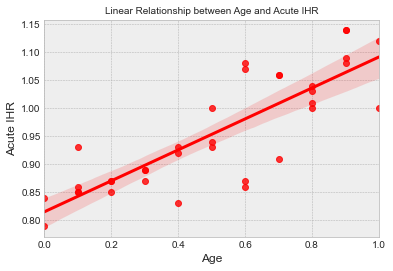

In [118]:
sns.regplot(x='Age', y = 'Acute IHR', data=merged, color='r' )
plt.title("Linear Relationship between Age and Acute IHR", fontsize=10)
plt.savefig('C:Age Vs Acute IHR.png', bbox_inches='tight', pad_inches=2, transparent=True)

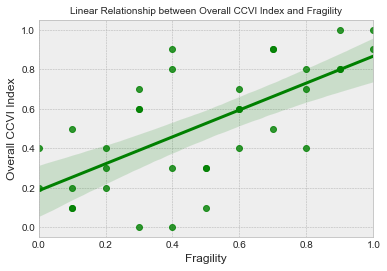

In [119]:
sns.regplot(x='Fragility', y ='Overall CCVI Index', data=merged, color='g' )
plt.title("Linear Relationship between Overall CCVI Index and Fragility", fontsize=10)
plt.savefig('C:Fragility VS Overall CCVI Index.png', bbox_inches='tight', pad_inches=2, transparent=True)

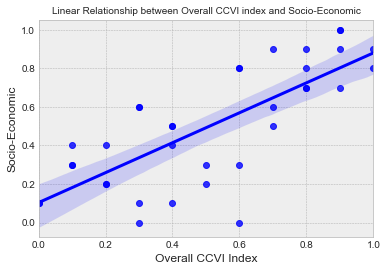

In [120]:
sns.regplot(x='Overall CCVI Index', y = 'Socio-Economic', data=merged, color='b' )
plt.title("Linear Relationship between Overall CCVI index and Socio-Economic", fontsize=10)
plt.savefig('C:CCVI vs Socio-Economic.png', bbox_inches='tight', pad_inches=2, transparent=True)

Type Markdown and LaTeX:  𝛼2

### Note: Do not limit your analysis to the provided TODOs. Perform more analyses e.g 
* Check for more external dataset
* Ask more questions & find the right answers by exploring the data